# Climate component diagnostics

The inputs and outputs to the `ClimateComponent` are as follows:

## Inputs
| Parameter | Description | Units |
| --- | --- | --- |
| AREA [R] | Region area | km$^2$ |
| Y [I] | Analysis year (including $Y_0$, the baseline year) | year |
| SENS | Climate sensitivity for a doubling of CO$_2$ | °C |
| OCEAN | Half life of global response to increased forcing | year |
| FSLOPE | Slope of radiative forcing equation | W / m$^2$ |
| FT [I] | Total forcing | W / m$^2$ |
| FS [I, R] | Radiative forcing from sulphates | W / m$^2$ |

## Outputs
| Parameter | Description | Units |
| --- | --- | --- |
| ET [I] | Equilibrium temperature | °C |
| RT [I, R] | Realised temperature | °C |
| GRT [I] | Global realised temperature | °C |

The ClimateComponent computes global realized temperature as follows (from Hope, 2006, equations 19-21):
$$ET_{i,r} = \frac{SENS}{ln(2)} \frac{FT_i + FS_{i,r}}{FSLOPE}$$
$$RT_{i,r} = RT_{i-1,r} + \left(1 - e^\frac{Y_i - Y_{i-1}}{OCEAN}\right) (ET_{i,r} - RT_{i-1,r})$$
$$GRT_i = \frac{\sum_r RT_{i,r} AREA_r}{\sum_r AREA_r}$$

In [1]:
include("../src/climate_model.jl")

┌ Info: Recompiling stale cache file /Users/jrising/.julia/compiled/v1.2/Mimi/LtuND.ji for Mimi [e4e893b0-ee5e-52ea-8111-44b3bdec128c]
└ @ Base loading.jl:1240


climatemodel (generic function with 3 methods)

In [2]:
using Dates
m = climatemodel("NDCs")
df = getdataframe(m, :ClimateTemperature, :rt_g_globaltemperature)
df[:time] = Date.(df[:time])
df

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:4
└ @ Core In[2]:4
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[2]:4
└ @ Core In[2]:4


,time,rt_g_globaltemperature
,Date,Float64⍰
1,2020-01-01,1.098
2,2030-01-01,1.49581
3,2040-01-01,1.85499
4,2050-01-01,2.1851
5,2075-01-01,2.91001
6,2100-01-01,3.40542
7,2150-01-01,4.04975
8,2200-01-01,4.55817
9,2250-01-01,4.9124


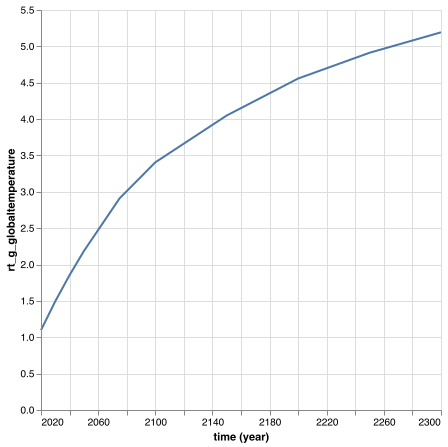

In [3]:
using VegaLite

df |> @vlplot(:line, x="year(time)", y=:rt_g_globaltemperature, width=400, height=400)